In [22]:
unstacked_signal

[<tf.Tensor 'unstack:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack:1' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack:2' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack:3' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack:4' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack:5' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack:6' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack:7' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack:8' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'unstack:9' shape=(?, 1) dtype=float32>]

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()

samples = 1000
times = [1e-2*i for i in range(samples+1)]
sin = np.sin(times[:-1])
sin_next = np.sin(times[1:])

time_step = 10
sin = np.reshape(sin, [-1, time_step, 1])
sin_next = np.reshape(sin_next, [-1, 1])
# print(sin.shape)

signal = tf.placeholder(tf.float32, 
                        shape=[None, time_step, 1])
signal_next = tf.placeholder(tf.float32, 
                             shape=[None, 1])

unstacked_signal = tf.unstack(signal, axis=1)
# print('inputs')
# for t in unstacked_signal:
#     print(t)

state_size = 30
rnn_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=state_size)
states, state = tf.nn.static_rnn(cell=rnn_cell, 
                                 inputs=unstacked_signal, 
                                 dtype=tf.float32)
# print('outputs :')
# for s in outputs:
#     print(s)
# print(state.shape)

states = tf.stack(states, axis=1)
reshaped_states = tf.reshape(states, [-1, state_size])
print(reshaped_states.shape)

output = tf.layers.dense(reshaped_states, 1, use_bias=False)
print(output.shape)

loss = tf.losses.mean_squared_error(signal_next, output)
train_op = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

accuracy = tf.contrib.metrics.streaming_pearson_correlation(output, signal_next)

(?, 30)
(?, 1)


step: 0, loss: 0.33245593309402466, acc: nan
step: 100, loss: 0.01670205406844616, acc: 0.9395778179168701
step: 200, loss: 0.00824590865522623, acc: 0.9627637267112732
step: 300, loss: 0.004834581632167101, acc: 0.9759806394577026
step: 400, loss: 0.003098050132393837, acc: 0.9796579480171204
step: 500, loss: 0.0020971118938177824, acc: 0.9841219186782837
step: 600, loss: 0.001475200173445046, acc: 0.9839699268341064
step: 700, loss: 0.001070057158358395, acc: 0.9881631135940552
step: 800, loss: 0.0007979567744769156, acc: 0.9895088076591492
step: 900, loss: 0.0006113409763202071, acc: 0.9905840158462524
step: 1000, loss: 0.00048125715693458915, acc: 0.9909660220146179
step: 1100, loss: 0.00038926085107959807, acc: 0.9921907186508179
step: 1200, loss: 0.00032326579093933105, acc: 0.9923980832099915
step: 1300, loss: 0.00027520698495209217, acc: 0.9925650358200073
step: 1400, loss: 0.00023964753199834377, acc: 0.9934253096580505
step: 1500, loss: 0.00021288888819981366, acc: 0.99417406

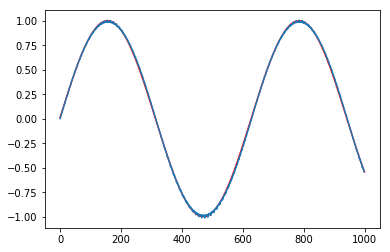

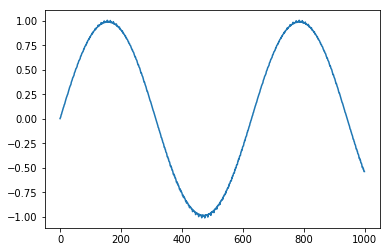

In [34]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    for i in range(3001):
        _, _loss, _output, _acc  = sess.run([train_op, loss, output, accuracy], feed_dict={signal: sin, signal_next: sin_next})
        if i%100==0:
            print('step: {}, loss: {}, acc: {}'.format(i, _loss, _acc[0]))
    plt.plot(sin_next, 'r')
    plt.plot(_output)
    plt.show()
    
    _pred = sess.run(output, feed_dict={signal: sin})
    plt.plot(_pred)
    plt.show()
    